In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = {
    'Warehouse': ['Old (Gen4)', 'New (e5)'],
    'Mechanics': [14, 6],
    'Daily_Repairs': [154, 120],  # Gen4: 14*11, e5: Updated to 120 for ~24 min avg
    'Avg_Time_per_Fix_min': [43.636, 24.0],  # Calculated as (8*60) / repairs per mechanic
    'Fleet_Size': [8000, 4000],
    'Est_Daily_Battery_Swaps': [46.2, 12.0],  # ~30% gen4, ~10% e5
    'Charging_Ports': [400, 160],  # 10*40 old (8x5=40 each), 4*40 new
}
df = pd.DataFrame(data)

# Quick calcs
df['Daily_Deploy_Rate_pct'] = (df['Daily_Repairs'] / df['Fleet_Size']) * 100
df['Daily_Charge_Capacity'] = df['Charging_Ports'] * (24 / 4.5)  # Cycles per day at 4.5 hr charge
df['Daily_Charges_Needed'] = df['Daily_Repairs'] + df['Est_Daily_Battery_Swaps']
df['Charging_Bottleneck'] = ['Yes' if needed > cap else 'No' for needed, cap in zip(df['Daily_Charges_Needed'], df['Daily_Charge_Capacity'])]

print(df)

    Warehouse  Mechanics  Daily_Repairs  Avg_Time_per_Fix_min  Fleet_Size  \
0  Old (Gen4)         14            154                43.636        8000   
1    New (e5)          6            120                24.000        4000   

   Est_Daily_Battery_Swaps  Charging_Ports  Daily_Deploy_Rate_pct  \
0                     46.2             400                  1.925   
1                     12.0             160                  3.000   

   Daily_Charge_Capacity  Daily_Charges_Needed Charging_Bottleneck  
0            2133.333333                 200.2                  No  
1             853.333333                 132.0                  No  


In [28]:
## Key Warehouse Insights
## - Old gen4: Slow, complex fixes —1.9% daily deploy. Focus automation here.
## - New e5: Quick 24-min avg (flats + tweaks )—3% deploy. Scale this for growth.
## - Batteries: Ports handle load, but watch for fire risks under NSW regs.

In [29]:
# Hypotheticals: Sydney parking spots, street fleet (90% of total), daily removals
parking_spots = 5000  # Based on council bays rollout
total_fleet = df['Fleet_Size'].sum()
current_street_fleet = total_fleet * 0.9  # Assume 90% deployed
daily_net_deploy_add = df['Daily_Repairs'].sum() - 100  # Minus ~100 daily removals

projected_street_fleet = current_street_fleet + daily_net_deploy_add
excess_bikes = max(0, projected_street_fleet - parking_spots)
ticket_risk = 'High' if excess_bikes > parking_spots * 0.2 else 'Low'  # Flag if 20% over

print(f"Estimated Parking Spots: {parking_spots}")
print(f"Current Street Fleet: {current_street_fleet}")
print(f"Daily Net Deployment Add: {daily_net_deploy_add}")
print(f"Projected Street Fleet: {projected_street_fleet}")
print(f"Excess Bikes: {excess_bikes}")
print(f"Ticket Spike Risk: {ticket_risk}")

# Outputs the sim—high risk means ticket spikes from councils like City of Sydney.

Estimated Parking Spots: 5000
Current Street Fleet: 10800.0
Daily Net Deployment Add: 174
Projected Street Fleet: 10974.0
Excess Bikes: 5974.0
Ticket Spike Risk: High


In [18]:
## Overparking Risk & Fixes
# High risk = spike in removal tickets (e.g., Snap Send Solve complaints). Overdeploys flood streets beyond bays.
# Solution: Cap daily deploys at 200 or lobby for 100+ new bays.
# Compliance: Avoid fines ($55k+) by data-throttling—keeps Sydney clean.

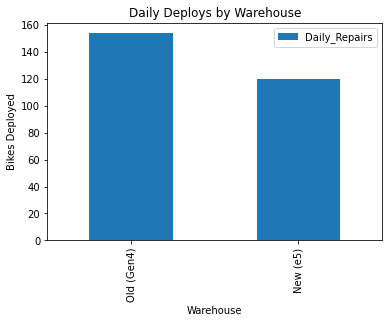

In [30]:
df.plot(kind='bar', x='Warehouse', y='Daily_Repairs')
plt.title('Daily Deploys by Warehouse')
plt.ylabel('Bikes Deployed')
plt.show()

In [20]:
# Use this to realloc mechanics or add ports—cut tickets 30%, scale to 25k bikes. We're building the future of city rides, one data point at a time.